# Water Maze in Autism-Related Rat Models: Behavioral Phenotyping of Arid1b, Grin2b, and Scn2a Strains

This tutorial shows how to access the data related to [EMBER:000205](https://dandi.emberarchive.org/dandiset/000205) using pynwb.

This dataset contains behavioral data from the water maze experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).

## Contents

1. [Setup and Data Access](#setup)
2. [Session and Subject Metadata](#metadata)
3. [Access Devices Metadata](#devices)
4. [Access Behavioral Videos](#behavior)
5. [Access Trials](#trials)


---

# 1. Setup and Data Access <a id="setup"></a>

## Import Required Libraries

In [1]:
# Core data manipulation and analysis
from pathlib import Path

import h5py

# Visualization
import matplotlib.pyplot as plt
import remfile
from dandi.dandiapi import DandiAPIClient, DandiInstance

# NWB and DANDI access
from pynwb import NWBHDF5IO

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Data Access Functions

In [2]:
def load_nwb_from_dandi(dandiset_id, subject_id, session_id):
    """
    Load NWB file from DANDI Archive via streaming.
    """
    pattern = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}*.nwb"
    dandi_instance = DandiInstance(
        "ember",
        "https://dandi.emberarchive.org",
        "https://api-dandi.emberarchive.org/api",
    )
    with DandiAPIClient(dandi_instance=dandi_instance) as client:
        client.dandi_authenticate()
        assets = client.get_dandiset(dandiset_id, "draft").get_assets_by_glob(
            pattern=pattern, order="path"
        )

        s3_urls = []
        for asset in assets:
            s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)
            s3_urls.append(s3_url)

        if len(s3_urls) != 1:
            raise ValueError(f"Expected 1 file, found {len(s3_urls)} for pattern {pattern}")

        s3_url = s3_urls[0]

    file = remfile.File(s3_url)
    h5_file = h5py.File(file, "r")
    io = NWBHDF5IO(file=h5_file, load_namespaces=True)
    nwbfile = io.read()

    return nwbfile, io


def load_nwb_local(directory_path, subject_id, session_id):
    """
    Load NWB file from local directory.
    """
    directory_path = Path(directory_path)
    nwbfile_path = directory_path / f"sub-{subject_id}_ses-{session_id}.nwb"
    
    if not nwbfile_path.exists():
        raise FileNotFoundError(f"NWB file not found: {nwbfile_path}")
    
    io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
    nwbfile = io.read()
    
    return nwbfile, io

In [3]:
# Load session data
dandiset_id = "000205"
session_id = "WM-2-Reference-Day1"
subject_id = "302-Arid1b(2)"

# Choose data source (DANDI streaming or local)
USE_DANDI = True  # Set to False to use local files

if USE_DANDI:
    nwbfile, io = load_nwb_from_dandi(dandiset_id, subject_id, session_id)
else:
    # Specify your local directory path
    local_directory = "YOUR_DIRECTORY_PATH"  # Replace with actual path
    nwbfile, io = load_nwb_local(local_directory, subject_id, session_id)

c:\Users\amtra\anaconda3\envs\kind-lab-to-nwb-env\Lib\site-packages\hdmf\spec\namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


---

# 2. Session and Subject Metadata <a id="metadata"></a>

In [4]:
print("=== SESSION INFORMATION ===")
print(f"Experiment description:\n {nwbfile.experiment_description}")
print(f"Session description:\n {nwbfile.session_description}")
print(f"Session start time:\n {nwbfile.session_start_time}")

=== SESSION INFORMATION ===
Experiment description:
 This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB.
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing.
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated spatial learning and memory in different rat models
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518,
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515,
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530) using t

In [5]:
print("=== SUBJECT INFORMATION ===")
print(f"ID: {nwbfile.subject.subject_id}")
print(f"Age: {nwbfile.subject.age}")
print(f"Species: {nwbfile.subject.species}")
print(f"Strain: {nwbfile.subject.strain}")
print(f"Genotype: {nwbfile.subject.genotype}")
print(f"Sex: {nwbfile.subject.sex}")

=== SUBJECT INFORMATION ===
ID: 302_Arid1b(2)
Age: None
Species: Rattus norvegicus
Strain: Arid1b
Genotype: WT
Sex: M


---

# 3. Access Devices Metadata <a id="devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [6]:
nwbfile.devices["camera_device 0"]

camera_device 0 abc.CameraDevice at 0x1907479210640
Fields:
  camera_name: BehavioralCamera
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  lens: Carl Zeiss lens with 20-step autofocus
  meters_per_pixel: 0.0004
  model: C920

In [7]:
nwbfile.devices["AtlantisPlatform"]

AtlantisPlatform pynwb.device.Device at 0x1907487521104
Fields:
  description: Programmable platform (10cm diameter) that can rise from pool bottom (Spooner et al., 1994)
  manufacturer: Example Manufacturer

In [8]:
nwbfile.devices["WaterMaze"]

WaterMaze pynwb.device.Device at 0x1907479211600
Fields:
  description: Circular pool (2m diameter) with Atlantis platform and spatial cues
  manufacturer: Example Manufacturer

---

# 4. Access Behavioral Video <a id="behavior"></a>

The behavioral video is stored as an external `ImageSeries` in the NWB file.

In [9]:
for name in nwbfile.acquisition:
    if "BehavioralVideo" in name:
        print(name)

BehavioralVideoTrial1
BehavioralVideoTrial2
BehavioralVideoTrial3
BehavioralVideoTrial4


In [10]:
video = nwbfile.acquisition["BehavioralVideoTrial1"]
video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Uncompressed size (bytes),0
Compressed size (bytes),0
Compression ratio,undefined
Data type,float64
Shape,"(1032,)"


The video filepath:

In [11]:
video.external_file[0]

'sub-302-Arid1b(2)_ses-WM-2-Reference-Day1_image\\4c71987b-41b3-4e8d-8f0e-34da83292b8b_external_file_0.avi'

The metadata of the device used to record the behavioral video:


In [12]:
video.device

camera_device 0 abc.CameraDevice at 0x1907479210640
Fields:
  camera_name: BehavioralCamera
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  lens: Carl Zeiss lens with 20-step autofocus
  meters_per_pixel: 0.0004
  model: C920

---

# 5. Access Trials <a id="trials"></a>

The `nwbfile.trials` contains information about each swim trial, including start and stop times, and trial-specific metrics such as path length, duration, and swim speed.

The source of this table is the Water Maze analysis CSV file, generated by the WaterMaze software.

You can convert the trials table to a `pandas.DataFrame` for easier exploration:

In [13]:
trials = nwbfile.trials.to_dataframe()
trials

,start_time,stop_time,platform,time_to_platform,trial_duration,distance_travelled_cm,average_speed,percent_time_near_walls,platform_quadrant,time_in_NE_quadrant,...,time_in_NW_quadrant,percent_time_in_NW_quadrant,time_to_platform_NW,time_in_SW_quadrant,percent_time_in_SW_quadrant,time_to_platform_SW,time_in_SE_quadrant,percent_time_in_SE_quadrant,time_to_platform_SE,timeseries
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,103.050,NE_A,102.760,103.050,3217.592,31.224,1.359,1,35.117,...,13.206,12.816,33.506,19.009,18.447,0.0,35.717,34.660,0.0,"[(0, 0, BehavioralVideoTrial1 pynwb.image.Imag..."
1,1320.0,1329.349,NE,9.051,9.349,303.463,32.459,0.000,1,3.936,...,0.000,0.000,0.000,0.000,0.000,0.0,5.413,57.895,0.0,"[(0, 0, BehavioralVideoTrial2 pynwb.image.Imag..."
2,2820.0,2827.957,NE,5.949,7.957,156.390,19.654,0.000,1,5.599,...,2.358,29.630,0.000,0.000,0.000,0.0,0.000,0.000,0.0,"[(0, 0, BehavioralVideoTrial3 pynwb.image.Imag..."
3,3840.0,3847.800,NE,7.501,7.800,253.789,32.537,2.532,1,1.284,...,0.296,3.797,0.000,3.456,44.304,2.6,2.765,35.443,4.6,"[(81, 0, BehavioralVideoTrial4 pynwb.image.Ima..."


C:\Users\amtra\AppData\Local\Temp\ipykernel_12768\2204253063.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot(trial_numbers, trials['time_to_platform'], 'o-', color='#8c564b',


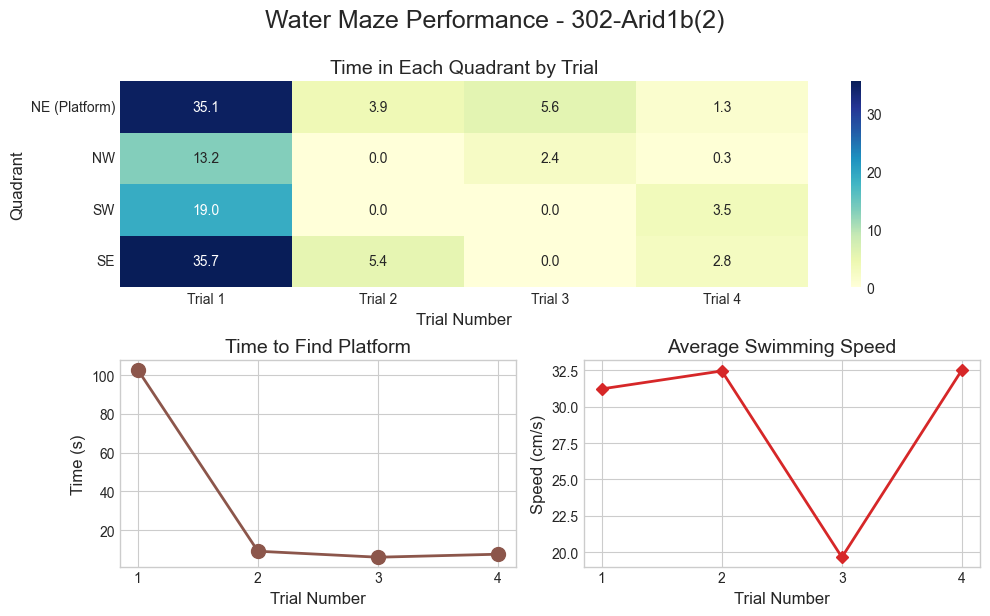

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set styling for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Create a figure with better organization of plots
fig = plt.figure(figsize=(10, 6))

# Create a grid specification for better layout control
gs = fig.add_gridspec(2, 2)

# 1. Heat map of movement patterns (quadrant preferences over trials)
ax1 = fig.add_subplot(gs[0, :])
quadrant_columns = ['time_in_NE_quadrant', 'time_in_NW_quadrant', 
                   'time_in_SW_quadrant', 'time_in_SE_quadrant']
quadrant_data = trials[quadrant_columns]
quadrant_data.columns = ['NE (Platform)', 'NW', 'SW', 'SE']
sns.heatmap(quadrant_data.T, annot=True, cmap='YlGnBu', fmt='.1f', ax=ax1)
ax1.set_title('Time in Each Quadrant by Trial', fontsize=14)
ax1.set_ylabel('Quadrant', fontsize=12)
ax1.set_xlabel('Trial Number', fontsize=12)
ax1.set_xticklabels([f'Trial {i+1}' for i in range(len(trials))])

# 2. Time to find platform (decreasing trend shows learning)
ax2 = fig.add_subplot(gs[1, 0])
trial_numbers = range(1, len(trials) + 1)
ax2.plot(trial_numbers, trials['time_to_platform'], 'o-', color='#8c564b', 
         linewidth=2, marker='o', markersize=10)
ax2.set_title('Time to Find Platform', fontsize=14)
ax2.set_xlabel('Trial Number', fontsize=12)
ax2.set_ylabel('Time (s)', fontsize=12)
ax2.set_xticks(trial_numbers)

# 3. Speed profile across trials
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(trial_numbers, trials['average_speed'], 'D-', color='#d62728', linewidth=2)
ax3.set_title('Average Swimming Speed', fontsize=14)
ax3.set_xlabel('Trial Number', fontsize=12)
ax3.set_ylabel('Speed (cm/s)', fontsize=12)
ax3.set_xticks(trial_numbers)

plt.tight_layout()
plt.suptitle(f"Water Maze Performance - {subject_id}", fontsize=18, y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()


The trials table also contains a `timeseries` column which contains references to the video associated with each trial.


In [15]:
# Access the external video from the trials table for the first trial
video_reference = nwbfile.trials["timeseries"][0][0]
video_object = video_reference.timeseries
video_object

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Uncompressed size (bytes),0
Compressed size (bytes),0
Compression ratio,undefined
Data type,float64
Shape,"(1032,)"
